In [1]:
!pip install graphviz

In [2]:
from sklearn.datasets import  load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"]=iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


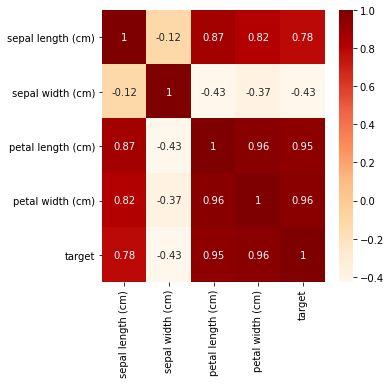

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(df.astype("float").corr(), cmap="OrRd", annot=True)

### 由上表熱點圖可以了解，與 target 最有相關的是 petal width(0.96), 其次是petal length(0.95)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), 
                                                    df["target"], test_size=0.1)

In [6]:
print("訓練資料為:")
x_train

訓練資料為:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
94,5.6,2.7,4.2,1.3
23,5.1,3.3,1.7,0.5
37,4.9,3.6,1.4,0.1
66,5.6,3.0,4.5,1.5
19,5.1,3.8,1.5,0.3
...,...,...,...,...
114,5.8,2.8,5.1,2.4
67,5.8,2.7,4.1,1.0
93,5.0,2.3,3.3,1.0
4,5.0,3.6,1.4,0.2


In [7]:
print("訓練資料答案為:")
y_train

訓練資料答案為:


94     1
23     0
37     0
66     1
19     0
      ..
114    2
67     1
93     1
4      0
113    2
Name: target, Length: 135, dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

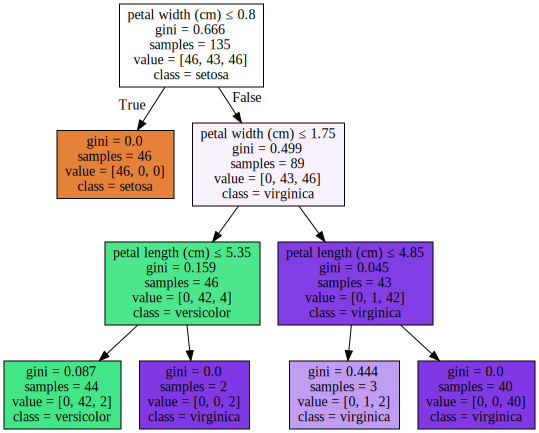

In [9]:
from sklearn.tree import export_graphviz
import graphviz
# 先設定畫決策樹的條件
g = export_graphviz(clf, out_file=None, feature_names=iris["feature_names"], 
                    class_names=iris["target_names"], filled=True, special_characters=True)
graph = graphviz.Source(g)
graph

#### 由 petal width < 0.8 cm 可以完全分出 setosa, 總共 45 setosa 個全部分類成功，剩下 89 個樣本待分類
#### 由 petal width < 1.75 cm 可以知道是 versicolor 共有 42 個, 而 petal width > 1.75 cm 的基本是 virginica 共有 42個

In [10]:
# test 資料預測試試 model
pre = clf.predict(x_test)
print("預測結果:", list(pre))
print("真正結果:", list(y_test))

預測結果: [2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0]
真正結果: [2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0]


In [11]:
from sklearn.metrics import accuracy_score
print("預測準確率為:", accuracy_score(y_test, pre))

預測準確率為: 0.9333333333333333


In [12]:
from sklearn.metrics import confusion_matrix
df2 = pd.DataFrame(confusion_matrix(y_test, pre))
df2.columns = ['setosa', 'versicolor', 'virginica']
# rename 方法改 index 成為文字, inplace=True 需要加上去, 才會在原本的dataframe上面改
df2.rename({0:"setosa", 1:"versicolor", 2:"virginica"}, axis='index', inplace=True)
df2

,setosa,versicolor,virginica
setosa,4,0,0
versicolor,0,7,0
virginica,0,1,3


### 原本應該是 virginica 的預測成為 versicolor 一次，其他皆為預測無誤